<a href="https://colab.research.google.com/github/SJhawar1010/Computer-Vision/blob/main/2348554_CV_Lab3_ImageEnhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('/content/drive/MyDrive/CV_images/aa.jpeg')

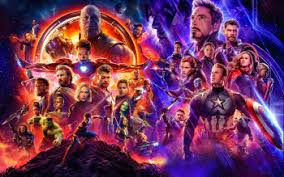

In [4]:
cv2_imshow(img)

In [9]:
print('Image Width is',img.shape[1])
print('Image Height is',img.shape[0])

Image Width is 284
Image Height is 177


In [5]:
img_negative = 255 - img

Text(0.5, 1.0, 'Image Negative')

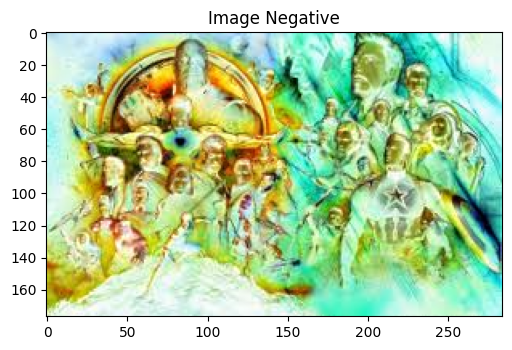

In [11]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 2)
plt.imshow(img_negative, cmap='gray')
plt.title('Image Negative')

negative refers to a reversed version of the original image. Each pixel's color value is inverted, so that dark areas become light, and vice versa.

In [14]:
img_8bit = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hist_eq = cv2.equalizeHist(img_8bit)


The code snippet has been written as the equalizeHist function in OpenCV expects an 8-bit single-channel image (CV_8UC1), but our image is in a different format.

To resolve the same, we converted our image to a single-channel 8-bit format before applying histogram equalization.

Text(0.5, 1.0, 'Equalized Image Histogram')

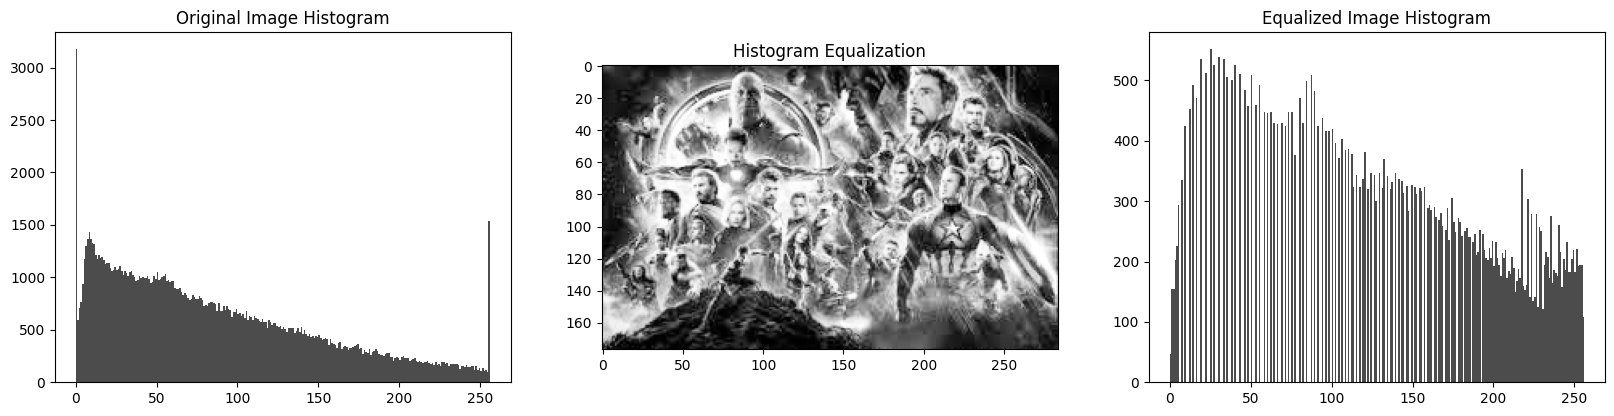

In [20]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 4)
plt.hist(img.flatten(), bins=256, range=[0, 256], color='black', alpha=0.7)
plt.title('Original Image Histogram')

plt.subplot(2, 3, 5)
plt.imshow(hist_eq, cmap='gray')
plt.title('Histogram Equalization')

plt.subplot(2, 3, 6)
plt.hist(hist_eq.flatten(), bins=256, range=[0, 256], color='black', alpha=0.7)
plt.title('Equalized Image Histogram')

Histogram equalization is a technique used in image processing to enhance the contrast of an image by redistributing the intensity values of its pixels. The primary goal is to make the histogram of the image more uniform, which can lead to improved visibility of details and a more visually appealing result.

Original Image Histogram:

The original image histogram is a graphical representation of the distribution of pixel intensities in the input image. It shows how many pixels in the image have each intensity value. The x-axis represents the intensity values, and the y-axis represents the frequency or number of pixels at each intensity level.
Histogram Equalization:

Histogram equalization is a technique used to modify the intensity distribution of an image to make it more uniform. The process involves transforming the original image's pixel values based on the cumulative distribution function (CDF) of its histogram. The goal is to spread out the intensity values across the entire available range, enhancing the overall contrast of the image.
Equalized Image Histogram:

The equalized image histogram is the histogram of the image after the application of histogram equalization. It represents the distribution of pixel intensities in the equalized image. Ideally, the equalized image histogram is more uniform than the original image histogram, indicating improved contrast.

In [17]:
lower_threshold = 100
upper_threshold = 200
gray_level_slicing = np.copy(img)
gray_level_slicing[(img >= lower_threshold) & (img <= upper_threshold)] = 255
gray_level_slicing[(img < lower_threshold) | (img > upper_threshold)] = 0

Text(0.5, 1.0, 'Gray Level Slicing')

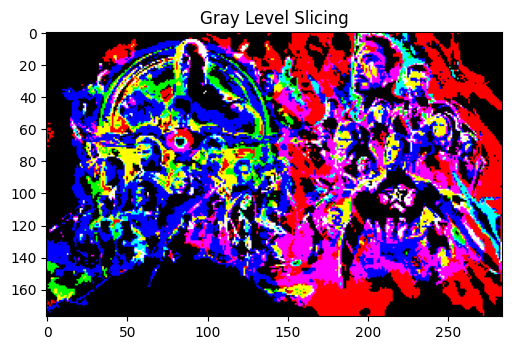

In [19]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 3)
plt.imshow(gray_level_slicing, cmap='gray')
plt.title('Gray Level Slicing')

Gray level slicing is used to enhance certain features in an image based on pixel intensity levels. The basic idea is to highlight or suppress specific intensity ranges within an image to improve its visual appearance or emphasize certain details.

In [21]:
def image_negative(image):
    return 255 - image

In [22]:
def gray_level_slicing(image, min_intensity, max_intensity):
    result = np.copy(image)
    result[(image >= min_intensity) & (image <= max_intensity)] = 255
    result[(image < min_intensity) | (image > max_intensity)] = 0
    return result

In [23]:
def histogram_equalization(image):
    equalized = cv2.equalizeHist(image)
    return equalized

In [25]:
img_8bit = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hist_eq = cv2.equalizeHist(img_8bit)

In [26]:
negative_img = image_negative(img)
sliced_img = gray_level_slicing(img, 100, 200)
equalized_img = histogram_equalization(img_8bit)

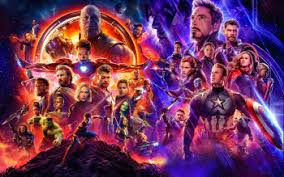

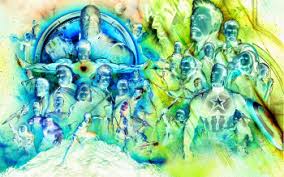

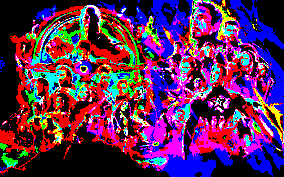

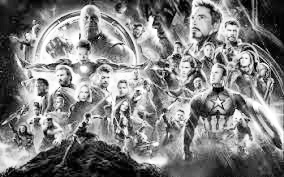

In [29]:
cv2_imshow(img)
cv2_imshow(negative_img)
cv2_imshow(sliced_img)
cv2_imshow(equalized_img)